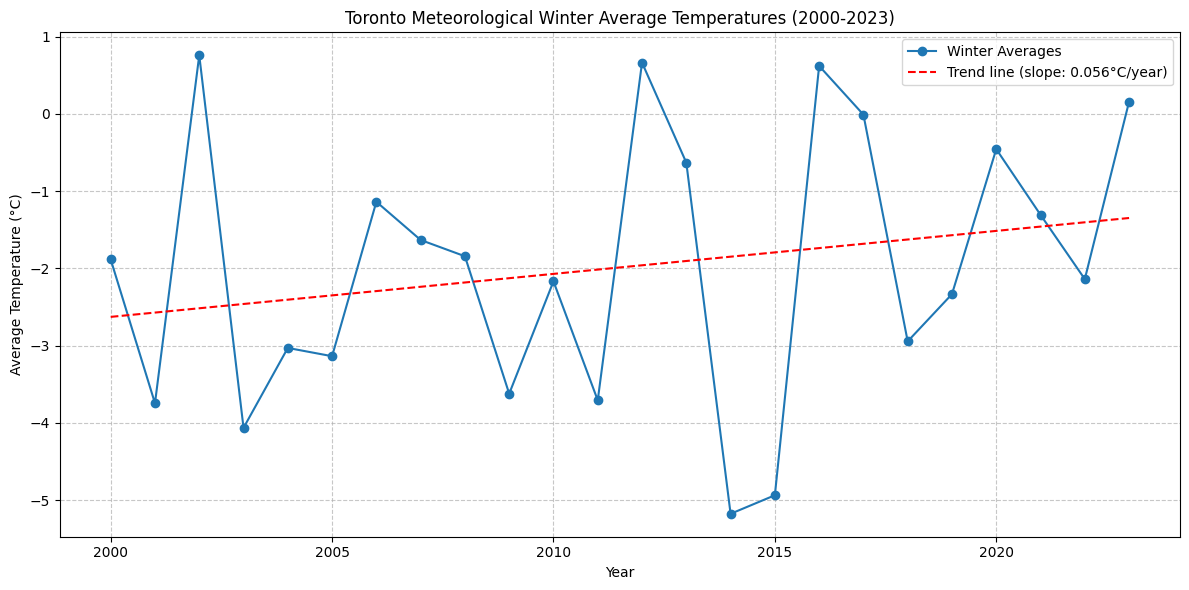

In [2]:
from datetime import datetime
import calendar
from meteostat import Point, Daily
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Create Point for Toronto, ON
location = Point(43.6532, -79.3832, 76)

# Function to get winter data (Dec of previous year through Feb)
def get_winter_data(year):
    # Winter starts December of previous year
    start = datetime(year - 1, 12, 1)
    # Get last day of February (handles leap years)
    _, last_day = calendar.monthrange(year, 2)
    # Winter ends last day of February of current year
    end = datetime(year, 2, last_day)

    data = Daily(location, start, end)
    return data.fetch()


# Create empty list to store all winter data
winter_data = []
winter_averages = {}

# Get data for winters from 2000 to 2023
for year in range(2000, 2024):
    data = get_winter_data(year)
    data['winter_year'] = year  # Add year identifier
    winter_data.append(data)
    # Calculate average for this winter
    winter_averages[year] = data['tavg'].mean()

# Create pandas Series for winter averages
winter_averages_series = pd.Series(winter_averages)
# print("\nWinter Averages:")
# print(winter_averages_series)

# Create the plot
plt.figure(figsize=(12, 6))
# Plot the winter averages
plt.plot(winter_averages_series.index, winter_averages_series.values, 'o-', label='Winter Averages')
# Calculate and plot trendline
x = winter_averages_series.index
y = winter_averages_series.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, 'r--', label=f'Trend line (slope: {slope:.3f}°C/year)')
# Customize the plot
plt.title('Toronto Meteorological Winter Average Temperatures (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Display the plot
plt.tight_layout()
plt.show()